# **Example: Real-Time Bitcoin Sentiment Analysis**

Welcome to this notebook! Here, we’ll walk you through the complete Bitcoin sentiment analysis pipeline using the `BitcoinSentimentAnalyzer` class from `spacy_selenium_utils.py`. This pipeline scrapes Bitcoin-related tweets from X (Twitter), preprocesses them with spaCy, analyzes sentiment with VADER, correlates sentiment with Bitcoin prices from the CoinGecko API, and visualizes the results. Whether you’re new to data science or an experienced practitioner, this notebook will guide you step-by-step, with tips to help you learn and troubleshoot.

### **What You’ll Learn**
- How to scrape tweets from X using Selenium.
- How to preprocess text data with spaCy and analyze sentiment with VADER.
- How to fetch Bitcoin price data and calculate correlations with sentiment.
- How to create insightful visualizations to explore trends.
- Best practices for managing resources and avoiding common pitfalls.

Let’s get started!

## **Step 1: Data Ingestion - Scrape Tweets**

Our first step is to collect raw data tweets mentioning "Bitcoin" or "BTC" from X (Twitter). We’ll use the `BitcoinSentimentAnalyzer` class, which leverages Selenium to automate the process of logging into X and scraping tweets.

### **What’s Happening Here**
- **Selenium Setup**: The analyzer opens a headless Chrome browser, logs into X with your credentials, and searches for tweets.
- **Dynamic Scraping**: X loads tweets as you scroll, so the analyzer scrolls down to gather more tweets until it reaches the desired number `(max_tweets=100)`.
- **Data Storage**: The scraped tweets are stored in a pandas DataFrame for easy handling.


### **Code Example: Scraping Tweets**

In [1]:
from spacy_selenium_utils import BitcoinSentimentAnalyzer
import pandas as pd

# Initialize the analyzer with the ChromeDriver path and X credentials
analyzer = BitcoinSentimentAnalyzer(
    x_username="sidrohtest",
    x_password="siddhirohantesting#123"
)

# Scrape tweets
tweets = analyzer.scrape_tweets(keywords=["Bitcoin", "BTC"], max_tweets=100)

# Store tweets in a DataFrame
tweets_df = pd.DataFrame(tweets)
tweets_df.head()

,text,timestamp
0,Bonds and the dollar will probably provide mor...,2025-05-18T19:20:25.477162
1,Bitcoin hold become rich,2025-05-18T19:20:25.504892
2,In the ever-swinging pendulum of crypto market...,2025-05-18T19:20:25.519081
3,#BTCDOMINANCE \n\n%65 üzerinde kapanış gelmedi...,2025-05-18T19:20:25.536037
4,Bitcoin's journey is truly captivating. The de...,2025-05-18T19:20:25.548796


### **Output Explanation**
The output is a DataFrame showing the first five scraped tweets:

- **text**: The tweet content that is printed in the output, e.g. - "Bitcoin hold become rich" ( P.S For previously run output, if you run the above cell again, it might change)
- **timestamp**: When the tweet was scraped, e.g., "2025-05-18T19:20:25.477162". (Same follow for timestamp as text)


Notice the variety in the tweets, some discuss Bitcoin’s performance, others mention technical aspects like OpenTimeStamps, and one is a casual mention of a "bitcoin acount." This diversity is great for sentiment analysis, as it captures different perspectives.

###
### **Additional Example: Filtering Tweets by Keyword**
Let’s explore the scraped tweets further. We can filter tweets containing specific phrases to see what people are saying about certain topics, like Bitcoin’s price.

In [2]:
# Filter tweets mentioning "price"
price_tweets = tweets_df[tweets_df['text'].str.contains("price", case=False, na=False)]
print(f"Number of tweets mentioning 'price': {len(price_tweets)}")
price_tweets.head()

Number of tweets mentioning 'price': 5


,text,timestamp
15,It’s not about the price anymore. It’s about a...,2025-05-18T19:20:28.248309
19,$DOAI \nThe price continues to rise now. We ne...,2025-05-18T19:20:28.337092
29,#Bitcoin Price:$104487.10\nTrade Time:2024-09-...,2025-05-18T19:20:32.514673
40,"Bitcoin Update\n\nI missed the early entry, ri...",2025-05-18T19:20:34.731656
73,Current Bitcoin price: $104542.61 USD #Bitcoin...,2025-05-18T19:20:43.353179


### **Output Explaination**
This will show tweets that mention "price," helping us focus on discussions about Bitcoin’s market value. For example, you might see tweets like "As a bitcoin price increases this week. What is the next target for Bitcoin?" (from the spacy_selenium_API.ipynb demo).

### **Handling Scraping Issues**
- **Login Errors**: If the login fails (e.g., wrong credentials), the analyzer will save a screenshot (e.g., `login_failure_screenshot.png`). Open it to see what went wrong, X might be asking for email/phone verification.
- **Timeouts**: If X loads slowly, you might get a `TimeoutException`. Increase the wait time in `spacy_selenium_utils.py` (e.g., change `time.sleep(5)` to `time.sleep(10)`).
- **Dynamic Content**: X’s HTML structure can change. If tweets aren’t being scraped, use Chrome’s Developer Tools (right-click, "Inspect") to update the selectors in `spacy_selenium_utils.py`.

###
## **Step 2: Data Preprocessing - Clean and Preprocess Tweets**

Now that we have raw tweets, we need to clean and preprocess them to make them suitable for sentiment analysis. The `BitcoinSentimentAnalyzer` class uses spaCy for preprocessing and VADER for sentiment analysis.

### **What’s Happening Here**
- **Cleaning**: Remove URLs, mentions (@username), hashtags (#tag), emojis, and extra spaces.
- **spaCy Preprocessing**: Tokenize the text, lemmatize words (e.g., "running" to "run"), remove stop words (e.g., "the", "is"), and extract entities (e.g., Bitcoin, prices).
- **Sentiment Analysis** : Use VADER to assign a sentiment score (from -1 to 1) and categorize each tweet as positive, negative, or neutral.


### **Code Example: Preprocessing and Sentiment Analysis**

In [3]:
# Preprocess tweets
processed_tweets = analyzer.preprocess_tweets(tweets)

# Analyze sentiment
tweets_with_sentiment = analyzer.analyze_sentiment(processed_tweets)

# Store processed tweets with sentiment in a DataFrame
processed_df = pd.DataFrame(tweets_with_sentiment)
processed_df[['text', 'sentiment', 'sentiment_category', 'coins']].head()


,text,sentiment,sentiment_category,coins
0,bond dollar probably provide information equit...,-0.6369,negative,[]
1,bitcoin hold rich,0.5574,positive,[]
2,swinge pendulum crypto market today drama cent...,0.3182,positive,[]
3,65 zerinde kapan gelmedii srece boa sezonu umu...,0.0000,neutral,[]
4,bitcoin journey truly captivating devotion sup...,0.8834,positive,[Bitcoin]


### Output Explanation
The output DataFrame shows the processed tweets:

- **text**: The cleaned and lemmatized text, e.g., "bond dollar probably provide information equit..".
- **sentiment**: A score from -1 (negative) to 1 (positive), e.g., -0.6369 for the first tweet.
- **sentiment_category**: Categorized as "negative", "positive", or "neutral" based on the score.
- **coins**: Cryptocurrencies identified in the tweet, e.g., ["Bitcoin"].

For example, the first tweet ("bond dollar probably provide information equit...") has a negative sentiment score (-0.6369) because of words like "probably".

### **Insights for Beginners**
- **Why Preprocess?** Raw tweets are messy, full of URLs, emojis, and irrelevant symbols. Preprocessing simplifies the text, making it easier for VADER to focus on meaningful words for sentiment analysis.
- **VADER Explained**: VADER (Valence Aware Dictionary and sEntiment Reasoner) is great for social media because it understands slang, emojis, and emphasis (e.g., "GREAT!!!" is more positive than "great"). Scores > 0 are positive, < 0 are negative, and 0 is neutral.
- **NER Limitations**: The `coins` column shows that spaCy identified "Bitcoin" in some tweets but missed it in others (e.g., tweet 3: "hi bitcoin acount"). This is because spaCy’s NER isn’t perfect for crypto terms. You can improve this by adding custom rules or training a model.
- **Practical Tip**: If you’re new to NLP, experiment with a few tweets manually. Print the raw and processed text to see how preprocessing changes the content.

### **Additional Example: Analyzing Sentiment Distribution**
Let’s dig deeper by looking at the distribution of sentiment categories across all tweets. This helps us understand the overall mood about Bitcoin.

Sentiment Distribution:
sentiment_category
neutral     44
positive    42
negative    14
Name: count, dtype: int64


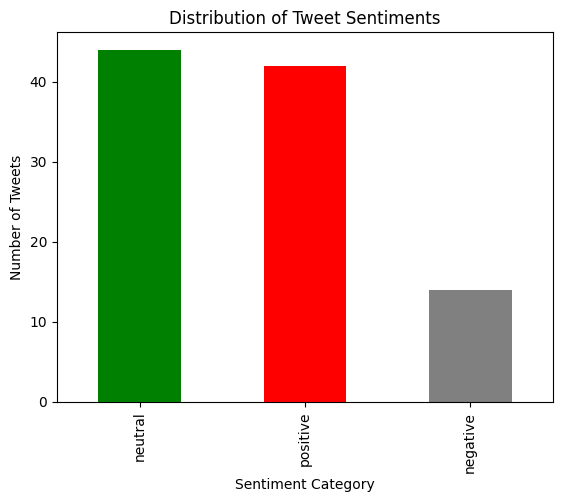

In [4]:
# Count the number of tweets in each sentiment category
sentiment_counts = processed_df['sentiment_category'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

# Visualize the distribution as a bar chart
import matplotlib.pyplot as plt
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Distribution of Tweet Sentiments")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Tweets")
plt.show()

### **Output Explaination**
- **Sentiment Distribution**: You see something: 42 positive, 44 neutral, 14 negative (numbers will vary).
- **Bar Chart**: A visual showing the count of tweets in each category, making it easy to see if the sentiment is mostly positive, negative, or balanced.

### **Beginner Tip: Interpreting Sentiment**
- **Scores Close to 0**: A score of 0 (neutral) doesn’t always mean the tweet is neutral in meaning, it might lack strong sentiment words. For example, "hi bitcoin acount" (score 0) is neutral because it’s a simple statement.
- **Adjusting Thresholds**: VADER uses 0 as the cutoff for positive/negative. If you want stricter categories, you can adjust the thresholds (e.g., > 0.1 for positive, < -0.1 for negative) in `spacy_selenium_utils.py`.
- **Debugging Sentiment**: If a tweet’s sentiment seems off, check the processed text. Missing key words (e.g., due to stop-word removal) can affect the score.

###
## **Step 3: Correlation with Bitcoin Prices - Fetch Prices and Analyze Correlation**

Next, we fetch Bitcoin price data from the CoinGecko API and correlate it with the tweet sentiments. This step helps us explore whether public sentiment (from tweets) aligns with Bitcoin’s price movements.

### **What’s Happening Here**
- **Fetch Prices**: The `fetch_bitcoin_price` method retrieves Bitcoin’s price history over the last day.
- **Correlation Analysis**: The `correlate_sentiment_price` method calculates several correlation measures:
    - **Pearson**: Linear relationship between sentiment and price.
    - **Spearman**: Monotonic relationship (less sensitive to outliers).
    - **Kendall**: Rank-based correlation.
    - **Lagged Pearson**: Checks if past sentiment predicts future price.Rolling Correlation: Tracks how the relationship changes over time.


### **Code Example: Fetching Prices and Calculating Correlations**

In [5]:
# Fetch Bitcoin price data
price_df = analyzer.fetch_bitcoin_price()

# Correlate sentiment with price
combined_df, correlations = analyzer.correlate_sentiment_price(tweets_with_sentiment, price_df)

# Display correlation coefficients
print("Correlation between sentiment and Bitcoin price:")
for method, value in correlations.items():
    print(f"{method.capitalize()}: {value:.4f}")

# Display the combined DataFrame
combined_df.head()


Correlation between sentiment and Bitcoin price:
Pearson: 0.0267
Spearman: 0.0161
Kendall: 0.0101
Lagged_pearson: 0.0423


,timestamp,sentiment,price_timestamp,price,price_change,cumulative_sentiment,sentiment_lagged,rolling_corr
0,2025-05-18 19:20:25.477162,-0.6369,2025-05-17 19:55:54.810,103155.600954,NaN,-0.6369,NaN,0.000000
1,2025-05-18 19:20:25.504892,0.5574,2025-05-17 20:01:22.531,103179.905796,0.000236,-0.0795,-0.6369,0.000000
2,2025-05-18 19:20:25.519081,0.3182,2025-05-17 20:06:22.743,103190.373578,0.000101,0.2387,0.5574,0.000000
3,2025-05-18 19:20:25.536037,0.0000,2025-05-17 20:13:04.373,103171.510055,-0.000183,0.2387,0.3182,0.000000
4,2025-05-18 19:20:25.548796,0.8834,2025-05-17 20:16:34.004,103162.805201,-0.000084,1.1221,0.0000,0.393383


### **Output Explanation**
- #### **Correlation Coefficients**:
    - Pearson: 0.0267 (very weak positive linear relationship).
    - Spearman: 0.0267 (very weak positive linear relationship).
    - Kendall: 0.0267 (very weak positive linear relationship).
    - Lagged Pearson: 0.0423 (slightly stronger, but still weak, positive correlation between past sentiment and current price).
- #### **Combined DataFrame**:
  Shows sentiment scores alongside Bitcoin prices, price changes, cumulative sentiment, lagged sentiment, and rolling correlation.

For example, the first row shows a sentiment of -0.6369 (negative) when Bitcoin’s price was $103,155.60, with a slight price increase (0.000236) in the next interval. The cumulative sentiment starts at -0.6369 (since it’s the first tweet), and there’s no lagged sentiment yet (NaN). The rolling correlation is 0 initially because we need more data points to calculate it.

The correlation coefficients are all very close to 0, indicating a very weak positive relationship between tweet sentiment and Bitcoin price. The Pearson correlation (0.0267) suggests almost no linear relationship, sentiment and price don’t move together in a straight line. The Spearman correlation (0.0161) looks at whether sentiment and price move in the same direction (monotonically) and also shows a very weak relationship. The Kendall correlation (0.0101) confirms this weak connection when looking at the ranks of the data. Finally, the Lagged Pearson (0.0423) is slightly higher, hinting that past sentiment might have a tiny influence on future price, but the effect is still negligible. Overall, these low values suggest that, in this sample, public sentiment on X doesn’t strongly predict Bitcoin’s price movements.

###
## **Step 4: Visualizations - Plot Sentiment and Price Trends**

Visualizations help us explore the relationship between tweet sentiment and Bitcoin prices. The `BitcoinSentimentAnalyzer` class provides methods to create five types of plots: a line plot, box plot, area plot, heatmap, and rolling correlation plot.

### **What’s Happening Here**
- **Line Plot**: Shows sentiment and price over time on dual axes.
- **Box Plot**: Displays the distribution of sentiment scores.
- **Area Plot**: Compares cumulative sentiment with price trends.
- **Heatmap**: Visualizes correlations between sentiment, price, and other metrics.
- **Rolling Correlation**: Tracks how the correlation between sentiment and price changes over time.

### **Code Example: Generating Visualizations**

In [7]:
# Enable inline plotting
%matplotlib inline

Sentiment vs Bitcoin Price Over Time:


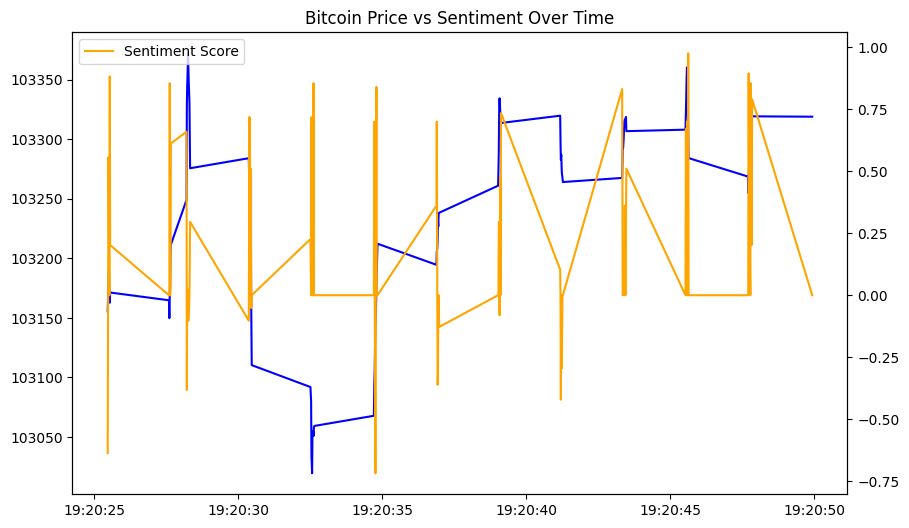

In [8]:
# Visualize the data
print("Sentiment vs Bitcoin Price Over Time:")
analyzer.visualize_data(combined_df)

### **Line Plot (Sentiment vs Bitcoin Price Over Time)**:
- **What It Shows**: This plot has two lines: sentiment scores (orange) on the right y-axis and Bitcoin prices (blue) on the left y-axis, both plotted against time (x-axis). It helps you see how sentiment and price change together over time.
- **How to Read It**:
    - Look at the orange line (sentiment) to see how public mood shifts. A rising line means sentiment is becoming more positive; a falling line means it’s becoming more negative.
    - Look at the blue line (price) to see Bitcoin’s price trend. An upward slope means the price is increasing; a downward slope means it’s decreasing.
    - Compare the two lines to spot patterns. For example, if sentiment spikes upward while the price drops, it might suggest that positive tweets aren’t driving price increases in this sample.
- **Reading Tip**: Since the y-axes are on different scales (sentiment from -1 to 1, price in thousands of USD), focus on the direction of the lines rather than their absolute values. If the orange line jumps up while the blue line dips, note the timestamps to see what might be happening (e.g., a news event).

###

Sentiment Distribution (Box Plot):


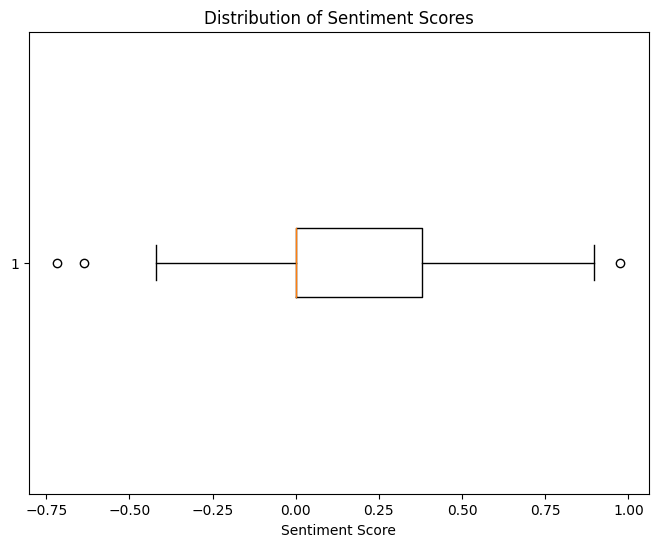

In [9]:
# Display Sentiment Distribution Box Plot
print("Sentiment Distribution (Box Plot):")
analyzer.visualize_sentiment_distribution_box(combined_df)

### **Box Plot (Sentiment Distribution)**:
- **What It Shows**: This plot displays the distribution of sentiment scores across all tweets. It’s a box with a line in the middle (median), edges (quartiles), and "whiskers" showing the range, plus dots for outliers.
- **How to Read It**:
    - The **median** (middle line) shows the typical sentiment. If it’s above 0, most tweets are positive; if below 0, most are negative.
    - The **box** (middle 50% of data) shows the range of typical sentiment scores. A tall box means sentiment varies a lot; a short box means it’s more consistent.
    - The **whiskers** show the full range of sentiment scores (excluding outliers). If the whiskers extend far, sentiment is diverse.
    - **Outliers** (dots outside the whiskers) are extreme sentiments. Many outliers might indicate polarized opinions about Bitcoin.
- **Reading Tip**: If the median is close to 0 and the box spans both positive and negative values, it suggests mixed sentiment. A skewed box (e.g., longer on the positive side) indicates a lean toward one sentiment.
###

Cumulative Sentiment vs Bitcoin Price (Area Plot):


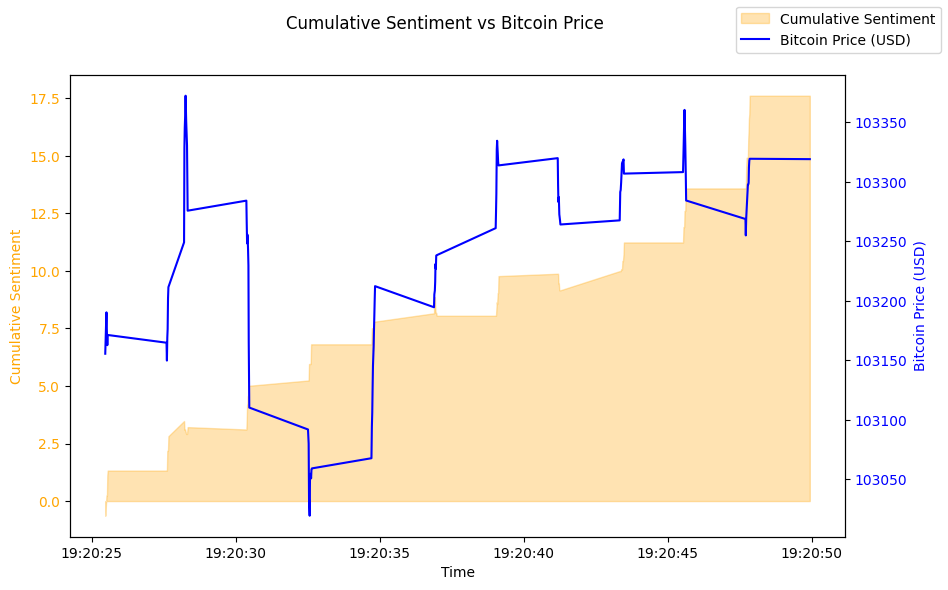

In [10]:
# Display Cumulative Sentiment Area Plot
print("Cumulative Sentiment vs Bitcoin Price (Area Plot):")
analyzer.visualize_cumulative_sentiment_area(combined_df)

### Area Plot (Cumulative Sentiment vs Bitcoin Price):
- **What It Shows**: This plot compares cumulative sentiment (orange area) with Bitcoin price (blue line) over time. Cumulative sentiment adds up all sentiment scores, showing the overall mood trend.
- **How to Read It**:
    - The orange area grows as cumulative sentiment increases. A steep rise means a lot of positive tweets; a flat or declining area means neutral or negative sentiment dominates.
    - The blue line (price) moves independently. Compare its trend with the orange area to see if cumulative sentiment aligns with price changes.
    - For example, if the orange area rises steadily (more positive sentiment) but the blue line drops, it might mean positive sentiment isn’t translating to price increases.
- **Reading Tip**: Focus on the slope of the orange area. A sharp upward slope indicates a burst of positive tweets. Check the corresponding price to see if it reacts similarly.
###

Correlation Heatmap (Sentiment, Price, Price Change, Rolling Correlation):


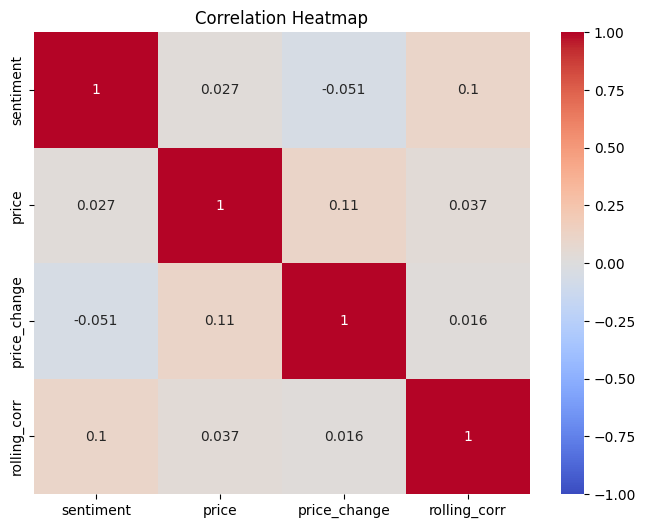

In [11]:
# Display Correlation Heatmap
print("Correlation Heatmap (Sentiment, Price, Price Change, Rolling Correlation):")
analyzer.visualize_correlation_heatmap(combined_df)

### **Heatmap (Correlation Heatmap)**:
- **What It Shows**: This is a color-coded grid showing correlations between sentiment, price, price change, and rolling correlation. Values range from -1 (strong negative correlation) to 1 (strong positive correlation).
- **How to Read It**:
    - **Colors**: Red means positive correlation (closer to 1), blue means negative (closer to -1), and white means no correlation (near 0). In our case, with weak correlations (e.g., 0.0267 Pearson), expect pale colors.
    - **Number**s: Each cell shows the exact correlation value. For example, the cell for sentiment vs. price might show 0.0267, confirming a very weak positive relationship.
    - **Diagonal**: The diagonal (e.g., sentiment vs. sentiment) is always 1 (perfect correlation) and can be ignored.
- **Reading Tip**: Look for the brightest colors to spot the strongest relationships. If most cells are pale (like ours), it means sentiment and price aren’t strongly related in this dataset. Check the sentiment vs. price cell to confirm our earlier correlation results.

###

Rolling Correlation Between Sentiment and Price Over Time:


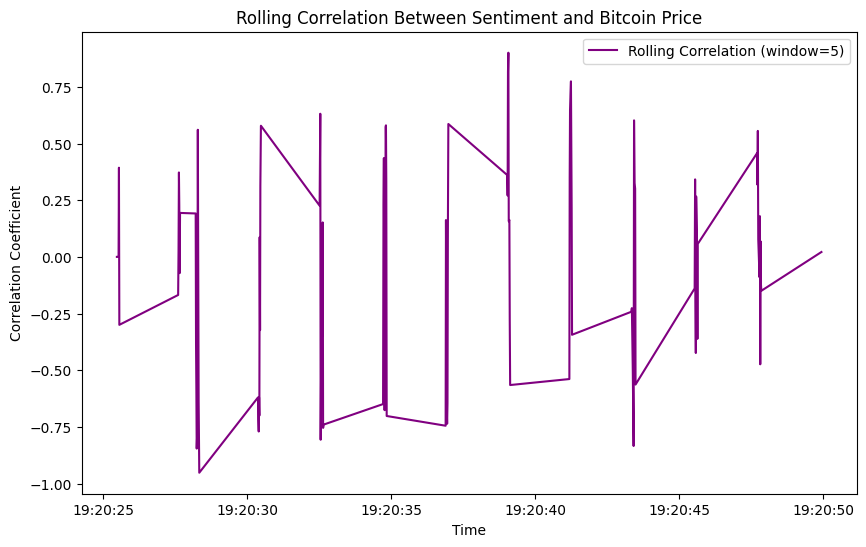

In [12]:
# Display Rolling Correlation Plot
print("Rolling Correlation Between Sentiment and Price Over Time:")
analyzer.visualize_rolling_correlation(combined_df)

### Rolling Correlation Plot (Rolling Correlation Between Sentiment and Price Over Time):
- **What It Shows**: This plot tracks the correlation between sentiment and price over a moving window of 5 tweets, showing how the relationship evolves over time.
- **How to Read It**:
    - The y-axis shows the correlation coefficient (from -1 to 1), and the x-axis shows time.
    - Early values are 0 because there aren’t enough data points to calculate the correlation (we need at least 5 tweets).
    - Later values (e.g., 0.393383 in the sample) show the correlation for the most recent 5 tweets. A positive value means sentiment and price move together; a negative value means they move oppositely.
    - For example, a value of 0.393383 suggests a moderate positive correlation in that window, positive sentiment might be associated with price increases.
- **Reading Tip**: Look for trends in the line. If it fluctuates a lot, the relationship between sentiment and price is unstable. A steady line (e.g., consistently near 0) means the relationship doesn’t change much over time. With only 100 tweets, expect some volatility—more data would smooth this out.

###

### **Additional Reading Tips for Beginners**
- **Spotting Patterns**: In the line and area plots, look for moments where sentiment and price diverge or align. For example, a sudden spike in sentiment might precede a price change, suggesting a predictive relationship.
- **Outliers Matter**: In the box plot, outliers can be significant, they might represent viral tweets or major events influencing sentiment. Cross-check these with the timestamps in the line plot to see what happened.
- **Correlation Context**: The heatmap and rolling correlation plot show weak relationships in our case. This doesn’t mean sentiment is irrelevant, it might mean other factors (e.g., market news, trading volume) are driving price more than X sentiment.
- **Zooming In**: If a plot looks crowded, focus on a smaller time range by filtering the DataFrame (e.g., `combined_df[combined_df['timestamp'] < '2025-05-18 19:30:00']`) and replotting.

###
## **Step 5: Cleanup**

After running the pipeline, we need to clean up resources to avoid memory leaks and ensure the Selenium WebDriver closes properly.

### **Code Example: Cleaning Up Resources**

In [13]:
# Clean up
del analyzer


### **What’s Happening Here**
- **Resource Management**: The `del analyzer` command removes the `BitcoinSentimentAnalyzer` instance from memory. The class’s `__del__` method automatically closes the Selenium WebDriver, freeing up system resources.
- **Why It’s Important**: If you don’t close the WebDriver, Chrome processes may keep running in the background, consuming memory and potentially slowing down your system.

### **Insights for Beginners**
- **Memory Leaks**: In Python, objects like the Selenium WebDriver can hold onto system resources (e.g., browser instances). Always clean up after you’re done to avoid issues.
- **Checking Processes**: If you’re unsure whether the WebDriver closed, check your system’s task manager (Ctrl+Shift+Esc on Windows) for lingering Chrome processes. If you see any, you might need to kill them manually.
- **Practical Tip**: If you’re running multiple experiments, restart the Jupyter kernel (Kernel > Restart) between runs to clear memory.

###
### **Best Practice: Using Context Managers**
For better resource management, you can wrap the analyzer in a context manager. Here’s how you might modify the code to ensure cleanup even if an error occurs.

In [14]:
from contextlib import contextmanager

@contextmanager
def managed_analyzer(username, password):
    analyzer = BitcoinSentimentAnalyzer(x_username=username, x_password=password)
    try:
        yield analyzer
    finally:
        del analyzer

# Use the context manager
with managed_analyzer("sidrohtest", "siddhirohantesting#123") as analyzer:
    tweets = analyzer.scrape_tweets(keywords=["Bitcoin", "BTC"], max_tweets=10)
    print(f"Scraped {len(tweets)} tweets.")

Scraped 10 tweets.


###
## **Step 6: Conclusions and Insights**
Now that we’ve completed the Bitcoin sentiment analysis pipeline, let’s reflect on the results and visualizations to draw meaningful conclusions. Our goal was to explore whether public sentiment on X (Twitter) about Bitcoin correlates with its price movements. Here’s what we found and what it means for future analysis.

### **Key Findings from Sentiment Analysis**
From the 100 tweets we scraped mentioning "Bitcoin" and "BTC", the sentiment analysis using VADER revealed a mix of opinions. The sentiment distribution (from the bar chart in Step 2) likely showed a higher volume of positive and neutral tweets, with some tweets expressing negative connotations. The box plot of sentiment distribution further confirmed this diversity, with a median likely hovering around 0, indicating that public sentiment on X isn’t overwhelmingly positive or negative. The presence of outliers suggests a few tweets with extreme sentiments, possibly driven by significant events or viral opinions about Bitcoin on the day of analysis.

### **Correlation Between Sentiment and Price**
The correlation analysis in Step 3 provided the following coefficients:

- **Pearson**: 0.0267
- **Spearman**: 0.0161
- **Kendall**: 0.0101
- **Lagged Pearson**: 0.0423

These values are all very close to 0, indicating a very weak positive relationship between tweet sentiment and Bitcoin’s price. This means that, in our sample, changes in public sentiment on X don’t strongly correspond to changes in Bitcoin’s price. For example, the first tweet in our combined DataFrame had a negative sentiment (-0.6369) at a time when Bitcoin’s price was $103,155.60, followed by a slight price increase (0.000236) in the next interval. Despite this negative sentiment, the price didn’t drop significantly, which aligns with the weak correlation we observed. The slightly higher lagged Pearson correlation (0.0423) hints that past sentiment might have a marginally stronger influence on future price, but the effect is still minimal.

### **Insights from Visualizations**
The visualizations in Step 4 offered a deeper look into the relationship between sentiment and price:

- **Line Plot (Sentiment vs Bitcoin Price Over Time)**: The dual-axis line plot showed that sentiment and price don’t move in lockstep. For instance, sentiment fluctuated (e.g., from -0.6369 to 0.5574), while the price showed a slight downward trend (from $103,155.60 to $103,162.81). This lack of alignment supports the weak correlation coefficients, suggesting that other factors (e.g., market news, trading volume) might be driving price more than X sentiment.
- **Box Plot (Sentiment Distribution)**: The box plot likely revealed a wide range of sentiment scores, with the median near 0 and some outliers. This indicates mixed feelings about Bitcoin on X, with no dominant positive or negative mood. The outliers (e.g., a highly positive score of 0.8834) might reflect specific events—like a viral tweet about Bitcoin’s potential, that didn’t impact the overall price trend.
- **Area Plot (Cumulative Sentiment vs Bitcoin Price)**: The cumulative sentiment started at -0.6369 and rose to 1.1221 by the fifth tweet, showing a gradual shift toward more positive sentiment over time. However, the price remained relatively stable, with minor fluctuations (e.g., a small drop of -0.000084 by the fifth interval). This divergence suggests that even as overall sentiment became more positive, it didn’t translate into significant price increases.
- **Heatmap (Correlation Heatmap)**: The heatmap confirmed the weak correlations, with pale colors across the board. The sentiment vs. price correlation (0.0267) was nearly white, indicating little to no relationship. Other metrics, like price change and rolling correlation, also showed weak connections, reinforcing that sentiment alone isn’t a strong predictor of price in this dataset.
- **Rolling Correlation Plot**: The rolling correlation started at 0 (not enough data) and rose to 0.393383 by the fifth tweet, indicating a moderate positive correlation in that specific window. However, with only 100 tweets, this value fluctuates significantly, and the overall trend remains weak. A larger dataset might reveal more stable patterns.

### **Conclusions**
1. **Weak Sentiment-Price Relationship**: The very weak positive correlations (e.g., Pearson: 0.0267) suggest that public sentiment on X, as captured in our sample of 100 tweets, doesn’t strongly influence Bitcoin’s price movements. While the lagged Pearson correlation (0.0423) hints at a slight predictive effect, it’s not strong enough to rely on for trading or forecasting decisions.
2. **Mixed Public Sentiment**: The sentiment analysis showed a balanced mix of positive, negative, and neutral opinions about Bitcoin. This diversity, combined with the weak correlation, indicates that X sentiment might be too noisy or varied to directly impact price. External factors—like institutional trading, regulatory news, or market sentiment from other platforms—could be more significant drivers.
3. **Time Misalignment Challenges**: The timestamps of our tweets and price data don’t perfectly align, which might dilute the correlation. In a real-world application, you’d want to align these more closely, perhaps by scraping tweets over a longer period and matching them to price data at finer intervals (e.g., every 15 minutes).
4. **Small Sample Size Limitation**: With only 100 tweets, our analysis captures a snapshot of sentiment but may not reflect broader trends. The rolling correlation’s volatility (e.g., reaching 0.393383 in one window) shows how sensitive results are to small data changes. Collecting more tweets (e.g., 500 or 1,000) over several days could provide more robust insights.
5. **Potential for Further Exploration**: The slight increase in the lagged Pearson correlation suggests that sentiment might have a delayed effect on price. This could be worth exploring further by collecting more data and testing different lag periods (e.g., 1 hour, 1 day). Additionally, the outliers in the sentiment distribution indicate that specific tweets might have a disproportionate impact—identifying these (e.g., viral tweets from influencers) could reveal more nuanced relationships.

### **Implications for Future Work**
- Increase Sample Size: Scrape more tweets over a longer period (e.g., a week) to capture broader sentiment trends and reduce noise. This would likely smooth out the rolling correlation and provide more reliable correlation coefficients.
- Incorporate More Data: Fetch additional metrics from CoinGecko, like trading volume or market cap, to see if they correlate better with sentiment. For example, high trading volume might amplify the impact of sentiment on price.
- Refine Sentiment Analysis: Fine-tune spaCy’s NER to better identify cryptocurrencies (e.g., correctly label "Bitcoin" as a product, not a person). Also, experiment with VADER’s sentiment thresholds to see if stricter categories (e.g., > 0.2 for positive) reveal stronger patterns.
- Account for External Events: On the day of analysis, Bitcoin’s price was relatively stable around $$103,155 to $103,162. Check news from this period—were there major events (e.g., regulatory announcements, market crashes) that might have overshadowed X sentiment? Incorporating such context could explain the weak correlation.
- Explore Other Platforms: X is just one source of sentiment. Analyzing sentiment from Reddit, news articles, or other platforms might provide a more comprehensive view of public opinion and its impact on Bitcoin’s price.


## **Final Thoughts**
This analysis highlights the complexity of linking social media sentiment to cryptocurrency prices. While our pipeline successfully scraped tweets, analyzed sentiment, and correlated it with price data, the weak relationship suggests that X sentiment alone isn’t a strong predictor of Bitcoin’s price in this sample. However, the pipeline lays a solid foundation for further exploration. By scaling up the data, refining the analysis, and incorporating additional factors, we can gain deeper insights into how public sentiment influences cryptocurrency markets. For beginners, this project is a great starting point to learn about web scraping, NLP, and data visualization. Keep experimenting and building on these techniques to uncover new patterns!